# INTERNATIONAL FOOTBALL RESULTS FROM 1872 TO 2022

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

## Load Data

In [5]:
football = pd.read_csv('football/results.csv', header=0)
football.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Important information about the columns in the Table

There are 9 columns:
 - Date: The information regarding the dates on which the specific matches were played
 - Home_team: The name of the countries playing in their home stadium
 - Away_team: The name of the countries playing in away stadium
 - Home_score: The goals scored by the home team
 - Away_score: The goals scored by the away team
 - Tournament: The tournament of which the match was a part of
 - City: The name of the city which hosts the match
 - Country: The name of hosting country
 - Neutral: Either the match was held in a neutral ground or not

### Converting the date time format

In [6]:
football['year'] = pd.DatetimeIndex(football.date).year
football['month'] = pd.DatetimeIndex(football.date).month
football['day'] = pd.DatetimeIndex(football.date).day
football['weekday'] = pd.DatetimeIndex(football.date).weekday

## Number of matches played from 1972 to 2022

In [7]:
len(football.date)

44557

## Average Number of Matches played per day

In [8]:
rate_of_matches = len(football.date)/len(football.date.unique())
rate_of_matches

2.861353711790393

## Matches played on weekly basis

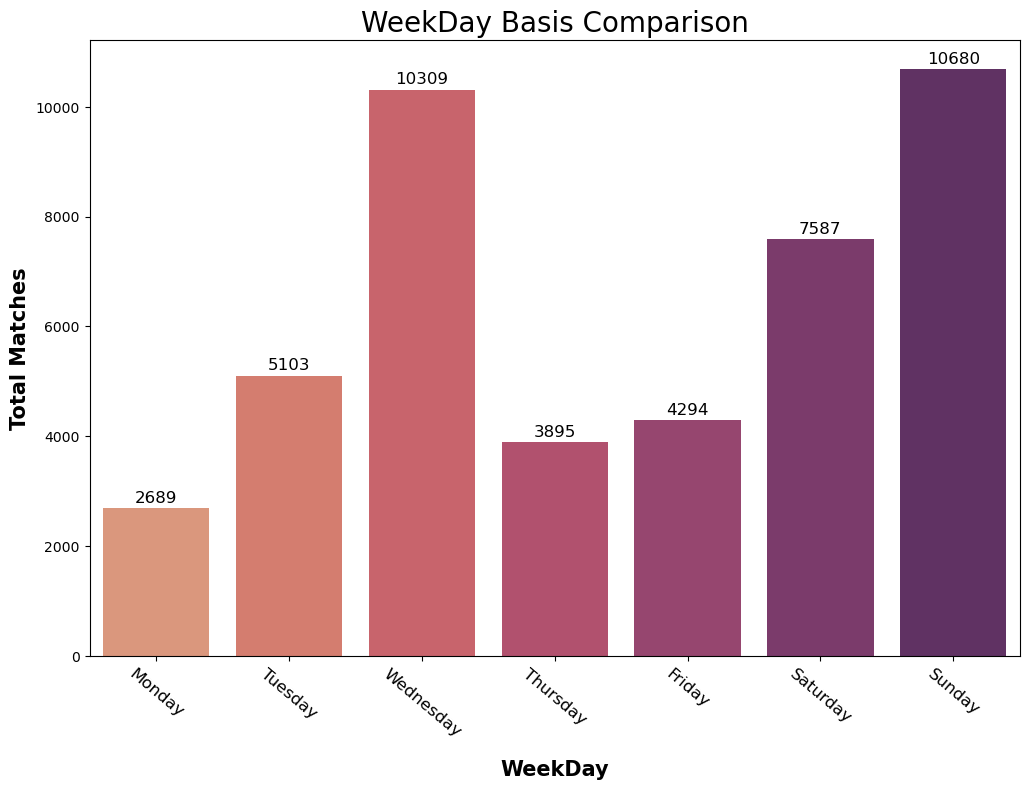

In [13]:
fig , axis = plt.subplots(figsize = (12,8))
sns.countplot(x = football.weekday, palette = 'flare', ax = axis)
axis.set_xlabel("WeekDay", fontsize = 15, fontweight = 'bold', labelpad = 15)
axis.set_ylabel("Total Matches", fontsize = 15, fontweight = 'bold')
axis.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = -40, fontsize = 12)
axis.bar_label(axis.containers[0], padding = 2, fontsize = 12)
axis.set_title('WeekDay Basis Comparison', fontsize = 20);

## Matches played on monthly basis

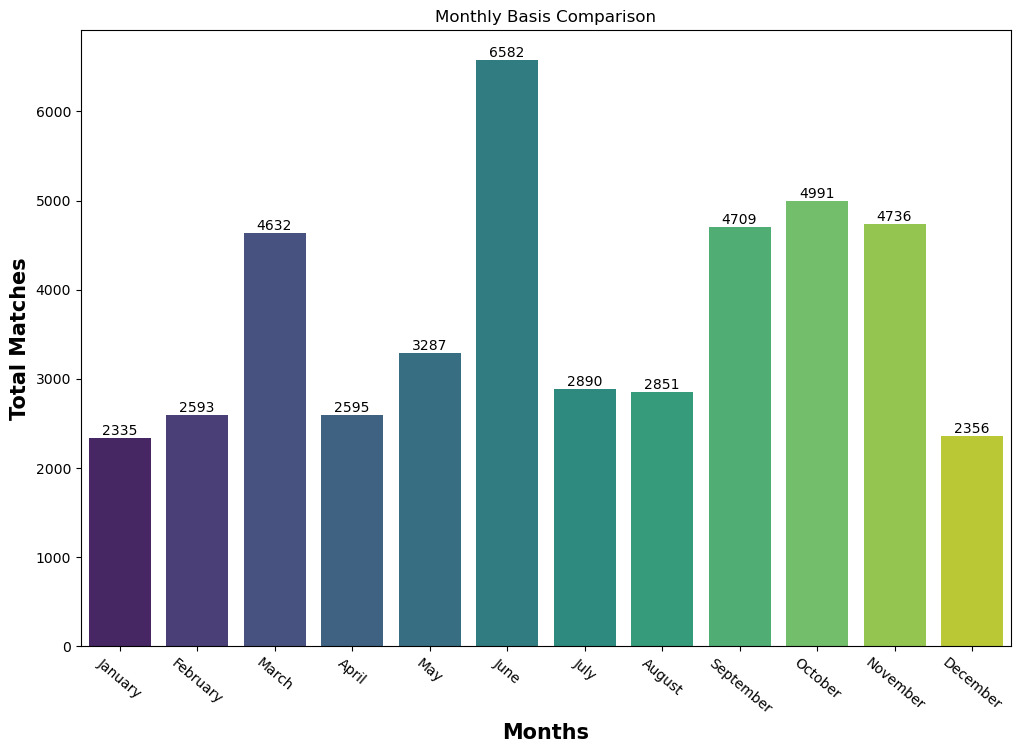

In [14]:
fig , axis = plt.subplots(figsize = (12,8))
sns.countplot(x = football.month, palette = 'viridis',ax=axis)
axis.set_xlabel('Months', labelpad = 5, fontsize = 15, fontweight = 'bold')
axis.set_ylabel('Total Matches', fontsize = 15, fontweight = 'bold')
axis.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'])
axis.tick_params(axis = 'x', rotation = -40)
axis.bar_label(axis.containers[0])
axis.set_title('Monthly Basis Comparison');

## Matches played on yearly basis

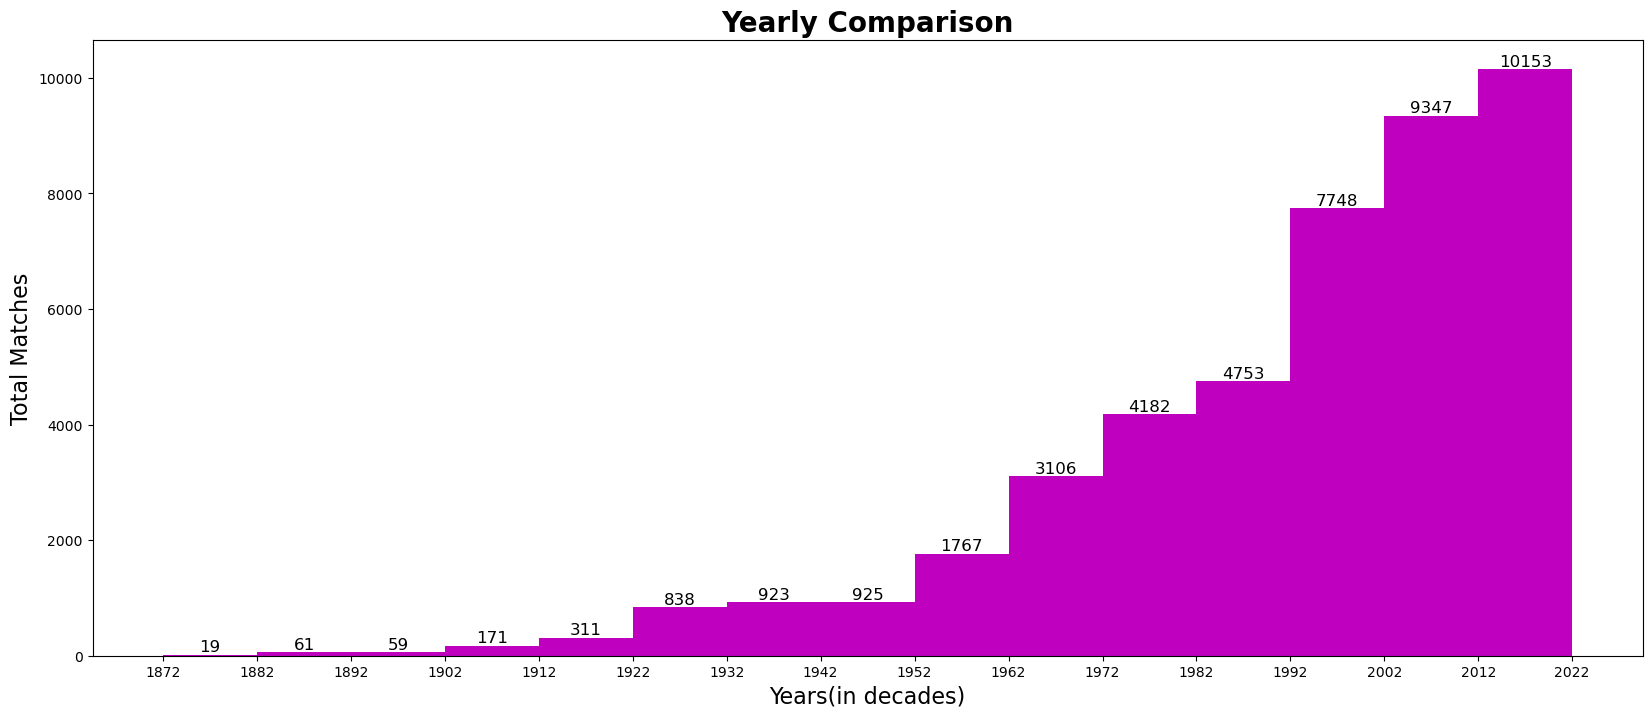

In [18]:
fig , axis = plt.subplots(figsize=(20,8))
axis.hist(football["year"], bins=list(range(football["year"].min(),football["year"].max()+1,10)), color= 'm')
axis.bar_label(axis.containers[0], fontsize = 12,color='k')
axis.set_xticks(list(range(football["year"].min(),football["year"].max()+1,10)))
axis.set_title("Yearly Comparison", fontsize = 20, fontweight = 'bold')
axis.set_xlabel("Years(in decades)",fontsize = 16)
axis.set_ylabel("Total Matches",fontsize = 16);

## Tournament

In [20]:
tour = pd.DataFrame({'Tournament':football.tournament.value_counts().index, 'Count':football.tournament.value_counts().values})
tour

,Tournament,Count
0,Friendly,17593
1,FIFA World Cup qualification,7878
2,UEFA Euro qualification,2631
3,African Cup of Nations qualification,1976
4,FIFA World Cup,964
...,...,...
137,Évence Coppée Trophy,1
138,Copa Confraternidad,1
139,Real Madrid 75th Anniversary Cup,1
140,TIFOCO Tournament,1


## Top 10 Tournaments

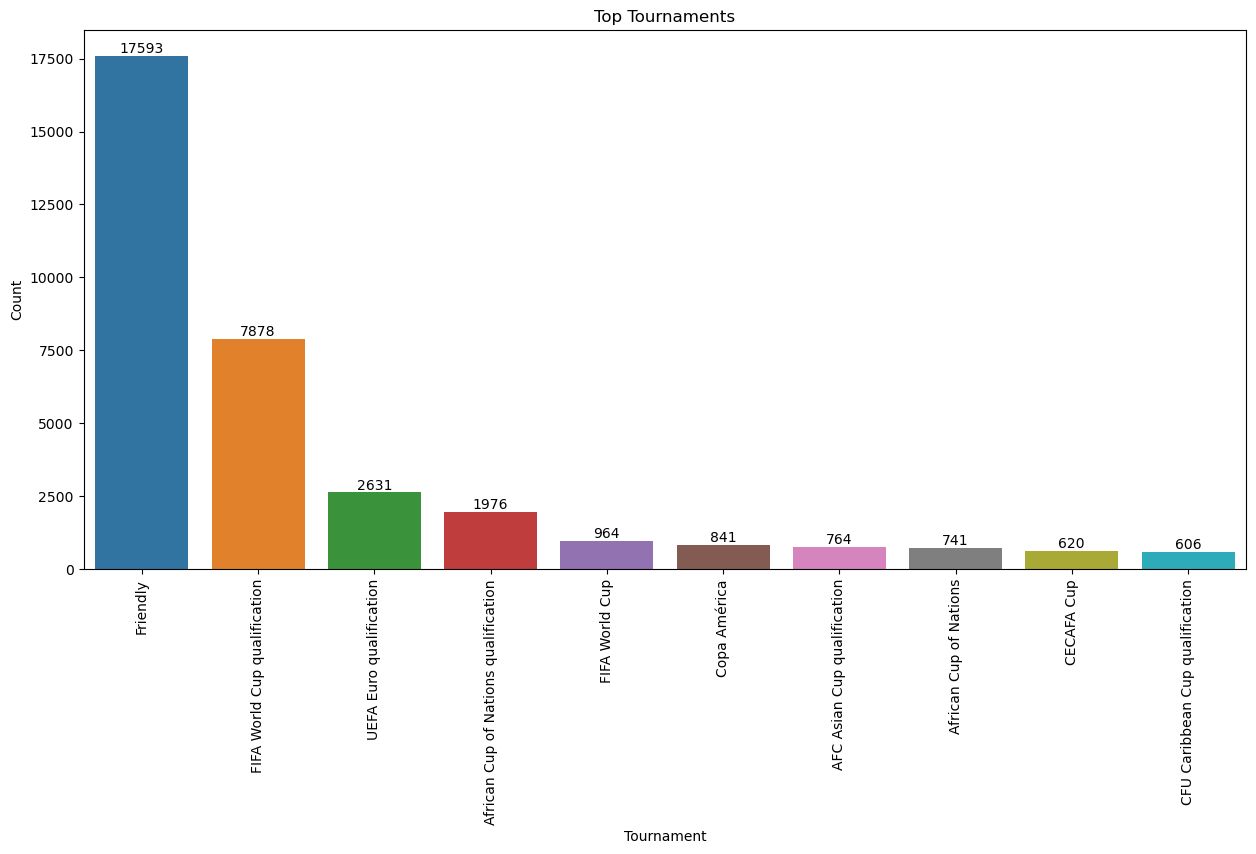

In [21]:
fig, axis = plt.subplots(figsize=(15,7))
sns.barplot(x=tour.Tournament.head(10),y=tour.Count.head(10), ax = axis)
axis.set_xticklabels(axis.get_xticklabels(),rotation=90)
axis.bar_label(axis.containers[0])
axis.set_title('Top Tournaments');

## The Total number of tournaments throughout the history of international football? (excluding friendlies)

In [26]:
print('Total number of tournaments throughout the history of international football is : {}.'.format(tournament_df.shape[0]-1))

Total number of tournaments throughout the history of international football is : 141.


## What is the tournament with the maximum number of total matches played?

In [31]:
max_matches = tournament_df[tournament_df.tournament != 'Friendly'].total_matches.max()
for x,y in zip(tournament_df[tournament_df.total_matches == max_matches].tournament, tournament_df[tournament_df.total_matches == max_matches].total_matches):
    print('{} tournament held the maximum number of {} matches in international football history.'.format(x,y))

FIFA World Cup qualification tournament held the maximum number of 7878 matches in international football history.


## Total number of matches played in the FIFA World Cup till now?

In [33]:
fifa_df = football[football.tournament == "FIFA World Cup"]
print("Total matches played in FIFA World Cup throughout history is : {}".format(fifa_df.shape[0]))

Total matches played in FIFA World Cup throughout history is : 964


## How many FIFA World Cup's have taken place till now?

In [34]:
print("Total FIFA World Cup tournaments held throughout the history is : {}".format(len(fifa_df.year.unique())))

Total FIFA World Cup tournaments held throughout the history is : 22


## In which year who hosted these FIFA World Cup tournaments?

In [35]:
years = fifa_df.year.unique()
hosts = fifa_df[fifa_df.neutral==False]
print("List of countries that hosted the FIFA World Cup is given below :")
for i in range(len(years)):
    print("{}.In {} FIFA World Cup was held in {}.".format(i+1,years[i],hosts.loc[hosts['year']==years[i],'home_team'].iloc[0]))

List of countries that hosted the FIFA World Cup is given below :
1.In 1930 FIFA World Cup was held in Uruguay.
2.In 1934 FIFA World Cup was held in Italy.
3.In 1938 FIFA World Cup was held in France.
4.In 1950 FIFA World Cup was held in Brazil.
5.In 1954 FIFA World Cup was held in Switzerland.
6.In 1958 FIFA World Cup was held in Sweden.
7.In 1962 FIFA World Cup was held in Chile.
8.In 1966 FIFA World Cup was held in England.
9.In 1970 FIFA World Cup was held in Mexico.
10.In 1974 FIFA World Cup was held in Germany.
11.In 1978 FIFA World Cup was held in Argentina.
12.In 1982 FIFA World Cup was held in Spain.
13.In 1986 FIFA World Cup was held in Mexico.
14.In 1990 FIFA World Cup was held in Italy.
15.In 1994 FIFA World Cup was held in United States.
16.In 1998 FIFA World Cup was held in France.
17.In 2002 FIFA World Cup was held in Japan.
18.In 2006 FIFA World Cup was held in Germany.
19.In 2010 FIFA World Cup was held in South Africa.
20.In 2014 FIFA World Cup was held in Brazil.
21.

## Country

## Total Number of Countries

In [39]:
football.country.unique().shape[0]

268

## List Of Countries

In [41]:
country = pd.DataFrame({'Country':football.country.value_counts().index, 'Count':football.country.value_counts().values})
country

,Country,Count
0,United States,1272
1,France,831
2,Malaysia,757
3,England,723
4,Sweden,662
...,...,...
263,Portuguese Guinea,1
264,Micronesia,1
265,Mali Federation,1
266,Lautoka,1


## Top 10 Countries

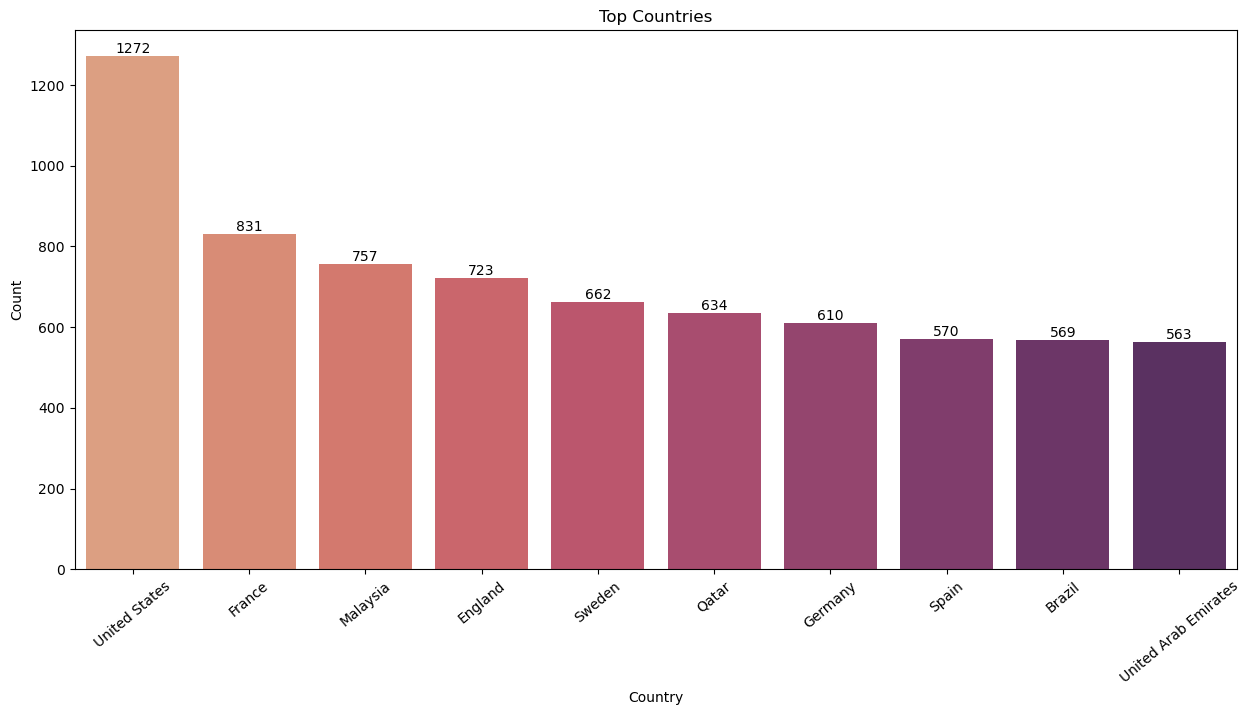

In [42]:
fig, axis = plt.subplots(figsize=(15,7))
sns.barplot(x=country.Country.head(10),y=country.Count.head(10), ax = axis, palette='flare')
axis.set_xticklabels(axis.get_xticklabels(),rotation=40)
axis.bar_label(axis.containers[0])
axis.set_title('Top Countries');

## Cities

## Total Number of Cities

In [43]:
football.city.unique().shape[0]

2019

## List of Cities

In [44]:
city = pd.DataFrame({'City': football.city.value_counts().index, 'Count':football.city.value_counts().values})
city

,City,Count
0,Kuala Lumpur,677
1,Doha,519
2,Bangkok,429
3,London,420
4,Budapest,411
...,...,...
2014,Cúcuta,1
2015,Domžale,1
2016,Qarshi,1
2017,Belle Vue,1


## Top 10 Cities

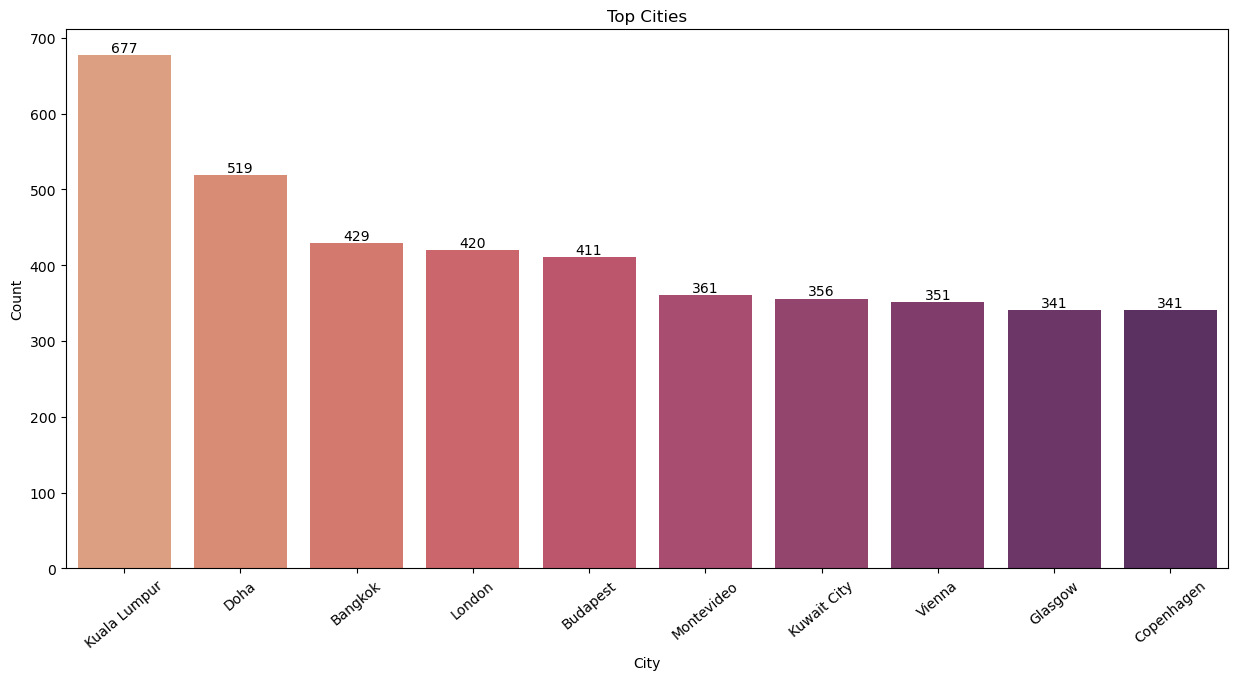

In [45]:
fig, axis = plt.subplots(figsize=(15,7))
sns.barplot(x=city.City.head(10),y=city.Count.head(10), ax = axis, palette='flare')
axis.set_xticklabels(axis.get_xticklabels(),rotation=40)
axis.bar_label(axis.containers[0])
axis.set_title('Top Cities');

## Correlation - which city belongs to which country

In [47]:
correlation_df = pd.pivot_table(data=football,values='date', index=['country','city'],aggfunc='count')
correlation_df.columns = ['count']
correlation_df

count
country     city            
Afghanistan Kabul          8
Albania     Berat          1
            Durrës         2
            Elbasan       19
            Korçë          1
...                      ...
Zimbabwe    Mutare         1
            Salisbury      8
            Umtali         1
Éire        Cork           1
            Dublin         6

[2147 rows x 1 columns]

In [60]:
correlation_df.loc['England']

,count
city,
Athersley,1
Aveley,3
Bedfont,1
Birmingham,18
Blackburn,5
Blackpool,1
Bodmin,1
Bracknell,4
Bradford,1


In [61]:
correlation_df.loc['Malaysia']

,count
city,
George Town,5
Ipoh,61
Johor Bahru,8
Kota Bharu,4
Krubong,1
Kuala Lumpur,585
Kuantan,6
Kuching,13
Malacca City,1


## Home Team

## Total Number of home games

In [62]:
len(football[football.neutral == False].home_team.unique())

266

## Top 10 countries to have the most home games

In [63]:
football[football.neutral == False].home_team.value_counts().head(10)

England          470
Sweden           467
France           448
Hungary          444
Germany          435
United States    422
Austria          411
Switzerland      402
Norway           400
Denmark          389
Name: home_team, dtype: int64

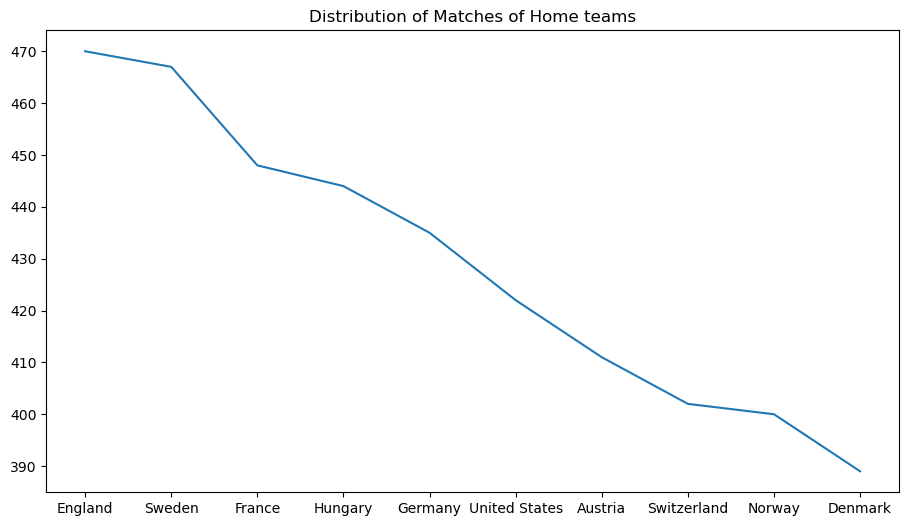

In [65]:
rcParams['figure.figsize'] = 11,6
sns.lineplot(x=football[football.neutral == False].home_team.value_counts().head(10).index, y=football[football.neutral == False].home_team.value_counts().head(10).values)
plt.title('Distribution of Matches of Home teams');

## Home score

## List of Home score

In [76]:
home_dist = pd.DataFrame({'Home Score':football[football.neutral == False].home_score.value_counts().index, 'Count':football[football.neutral == False].home_score.value_counts().values})
home_dist

,Home Score,Count
0,1,9907
1,0,7661
2,2,7503
3,3,4092
4,4,2094
5,5,1015
6,6,554
7,7,303
8,8,151
9,9,88


## Highest number of goals scored by a home team

In [73]:
home_dist['Home Score'].max()

31

## Distribution of home score

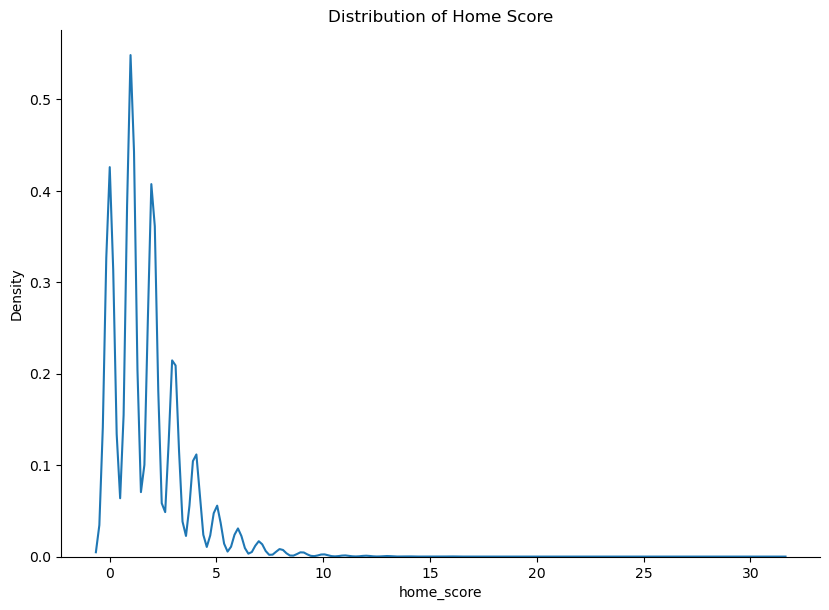

In [75]:
sns.displot(football[football.neutral == False].home_score, kind='kde', height=6, aspect=1.4)
plt.title('Distribution of Home Score');

## Team that scored thew most home goals

In [94]:
for x,y,z in zip(football[football.home_score == max_home_goals].home_team, football[football.home_score == max_home_goals].away_team, football[football.home_score == max_home_goals].year):
    print("{}'s team scored the most home goals in international football history against {} in {}.\n".format(x,y,z))

Australia's team scored the most home goals in international football history against American Samoa in 2001.



## Away Teams

## Total Number of Away Games

In [77]:
len(football[football.neutral == False].away_team.unique())

293

## Top 10 countries to play the most away games

In [79]:
football[football.neutral == False].away_team.value_counts().head(10)


Sweden       476
England      468
Hungary      462
Finland      411
Germany      398
Norway       392
Argentina    391
Uruguay      389
Scotland     388
Poland       382
Name: away_team, dtype: int64

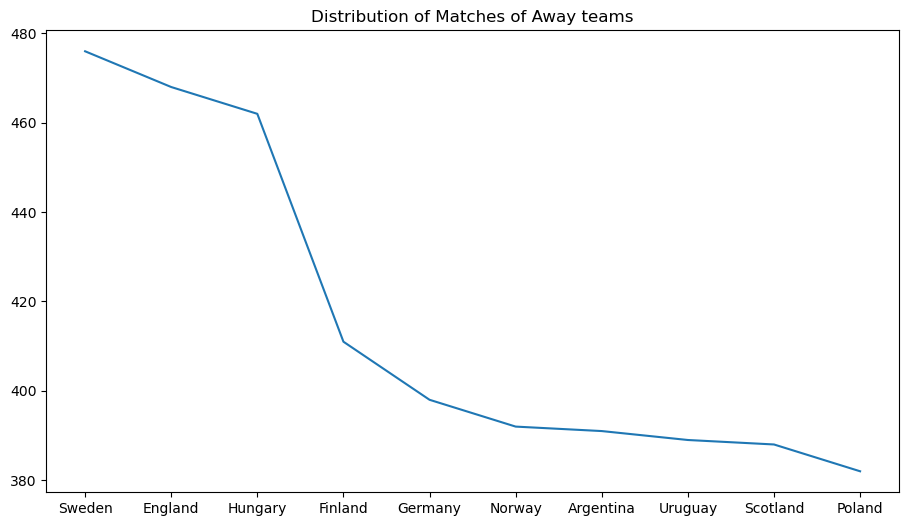

In [82]:
sns.lineplot(x=football[football.neutral == False].away_team.value_counts().head(10).index, y=football[football.neutral == False].away_team.value_counts().head(10).values)
plt.title('Distribution of Matches of Away teams');

## Total Number of Away score

In [84]:
away_dist = pd.DataFrame({'Away Score':football[football.neutral == False].away_score.value_counts().index, 'Count':football[football.neutral == False].away_score.value_counts().values})
away_dist

,Away Score,Count
0,0,12971
1,1,10883
2,2,5617
3,3,2329
4,4,956
5,5,389
6,6,175
7,7,80
8,8,40
9,9,15


## Highest number of away score

In [85]:
away_dist['Away Score'].max()

15

## Distribution of away score

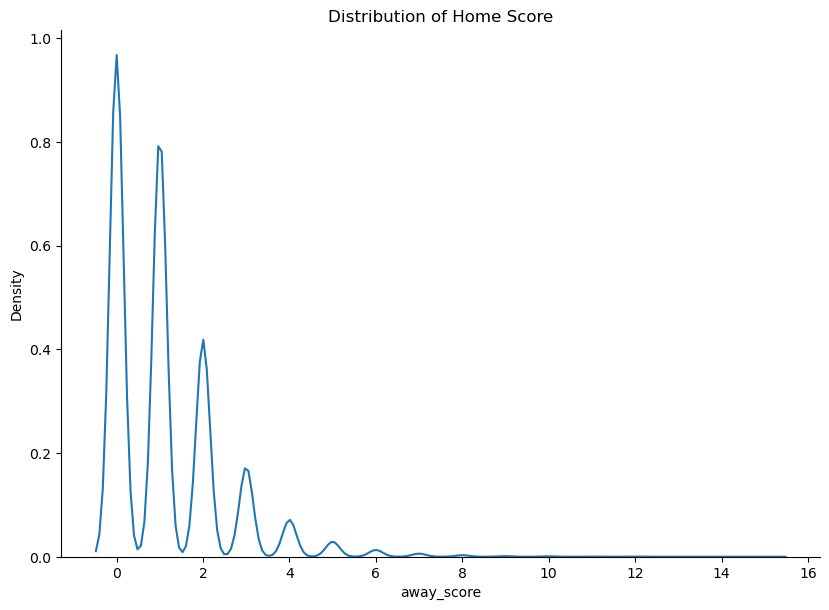

In [86]:
sns.displot(football[football.neutral == False].away_score, kind='kde', height=6, aspect=1.4)
plt.title('Distribution of Away Score');

## Team that scored the most away goals

In [93]:
for x,y,z in zip(football[football.home_score == max_away_goals].away_team, football[football.home_score == max_away_goals].home_team, football[football.home_score == max_away_goals].year):
    print("{}'s team scored the most away goals in international football history against {} in {}.\n".format(x,y,z))

Réunion's team scored the most away goals in international football history against Mauritius in 1950.

Laos's team scored the most away goals in international football history against Egypt in 1963.

Yemen's team scored the most away goals in international football history against Algeria in 1973.

Sark's team scored the most away goals in international football history against Frøya in 2003.

Guam's team scored the most away goals in international football history against Hong Kong in 2007.

Darfur's team scored the most away goals in international football history against Northern Cyprus in 2012.

Bhutan's team scored the most away goals in international football history against Qatar in 2015.

Anguilla's team scored the most away goals in international football history against Trinidad and Tobago in 2019.

